This notebook is designed to visualize phasenet-tf predictions and waveforms.

In [12]:
import matplotlib.pyplot as plt
from pathlib import Path
import obspy
import numpy as np

In [3]:
BASE_DIR=Path("/Users/ziyixi/temp/mantle_wedge_examples_result")

In [59]:
def plot(event_id,station_id):
    waveform=obspy.read(BASE_DIR/f"{event_id}/*{station_id}*waveform.mseed")
    prediction=obspy.read(BASE_DIR/f"{event_id}/*{station_id}*prediction.mseed")

    # filter waveform between 0.5HZ and 8HZ
    waveform.detrend("linear")
    waveform.detrend("demean")
    waveform.filter("bandpass",freqmin=0.5,freqmax=8,zerophase=True,corners=4)
    
    # slice waveform and prediction from starttime+9min to starttime+12min
    waveform=waveform.slice(waveform[0].stats.starttime+7.5*60,waveform[0].stats.starttime+10.5*60)
    prediction=prediction.slice(prediction[0].stats.starttime+7.5*60,prediction[0].stats.starttime+10.5*60)

    # use matplotlib to plot waveform and prediction, first three rows are waveform, last row is prediction
    fig,ax=plt.subplots(4,1,figsize=(10,10))
    for i in range(3):
        ax[i].plot(np.linspace(-60,120,len(waveform[i].data)),waveform[i].data,label=waveform[i].id,color="black",lw=0.5)
        ax[i].legend()
    ax[3].plot(np.linspace(-60,120,len(prediction[0].data)),prediction[0].data,label=prediction[0].id,color="red")
    ax[3].plot(np.linspace(-60,120,len(prediction[1].data)),prediction[1].data,label=prediction[1].id,color="black")
    ax[3].legend()
    plt.show()

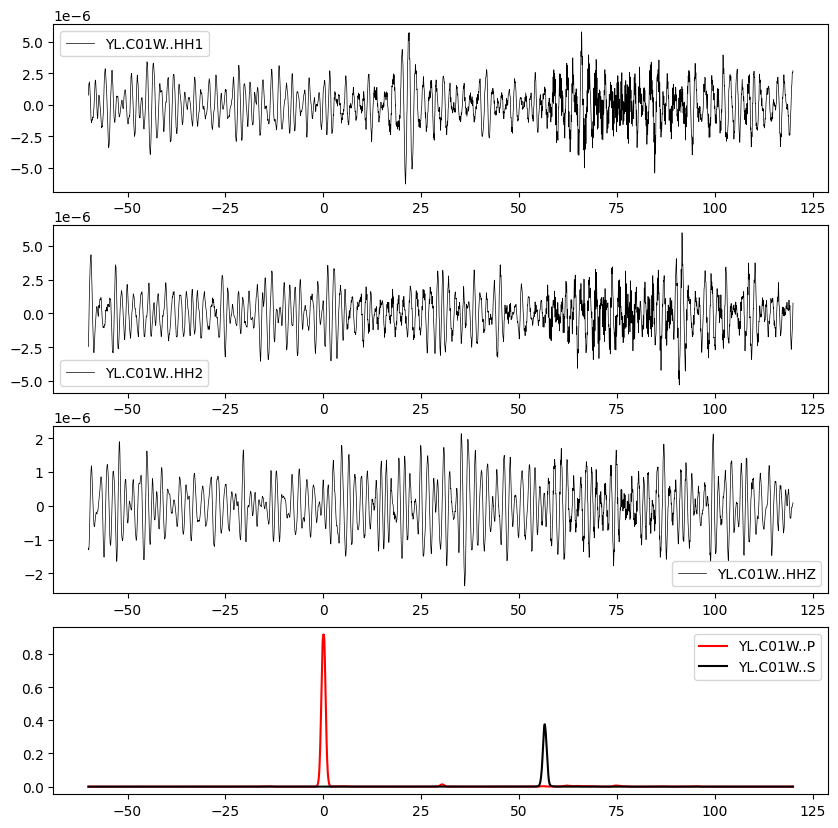

In [79]:
plot(26520,"C01W")